#  Probability Distributions

#### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [17]:
n_trials = 100_000
np.random.seed(123)

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

Text(0, 0.5, 'P(X)')

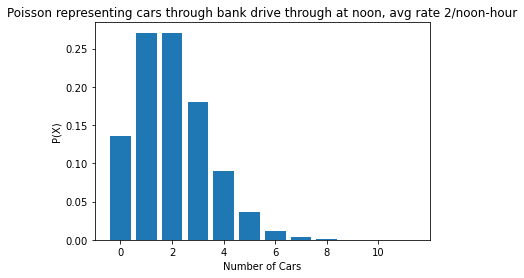

In [130]:
λ = 2 #during noon hour, (λ is lambda, which is expected rate of occurances)

x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson representing cars through bank drive through at noon, avg rate 2/noon-hour')
plt.xlabel('Number of Cars')
plt.ylabel('P(X)')

### - What is the probability that no cars drive up in the noon hour?

In [133]:
# Theoretical
λ = 2 

stats.poisson(λ).pmf(0)

0.1353352832366127

In [164]:
# Experimental
car_numbers = np.random.poisson(2, n_trials)
(car_numbers == 0).mean()

0.13597

### - What is the probability that 3 or more cars come through the drive through?

In [135]:
# Theoretical

stats.poisson(λ).sf(2)

0.32332358381693654

In [165]:
# Experimental

(car_numbers >= 3).mean()

0.32557

### -How likely is it that the drive through gets at least 1 car?

In [137]:
# Theoretical

stats.poisson(λ).sf(0)

0.8646647167633873

In [166]:
# Experimental
(car_numbers >= 1).mean()

0.86403

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [172]:
μ = 3.0
σ = .3

### - What grade point average is required to be in the top 5% of the graduating class?

In [173]:
# Theoretical
grades = stats.norm(μ, σ)
top_5_percent = grades.isf(.05)
top_5_percent

3.4934560880854417

In [174]:
stats.norm (μ,σ).isf(0.05)

3.4934560880854417

In [188]:
# Experimental
(np.percentile([np.random.normal(3, 0.3, n_trials)],[95])).mean()

3.4938917316223566

### - What GPA constitutes the bottom 15% of the class?

In [180]:
# Theoretical 
stats.norm(μ, σ).ppf(.15)

2.689069983151863

In [187]:
# Experimental
(np.percentile([np.random.normal(3, 0.3, n_trials)],[15])).mean()

2.685442956278943

### - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [189]:
# Theoretical
stats.norm(μ, σ).ppf([0.2,0.3])

#Yes, a student with a 2.8 GPA would qualify.

array([2.74751363, 2.84267985])

In [190]:
# Experimental
(np.percentile([np.random.normal(3, 0.3, n_trials)],[30]))

array([2.8429087])

### - If I have a GPA of 3.5, what percentile am I in?

In [178]:
# Theoretical
stats.norm(μ, σ).cdf(3.5)

0.9522096477271853

In [179]:
# Experimental
(np.random.normal(3, 0.3, n_trials) < 3.5).mean()

0.95283

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [3]:
# Theoretical

n_trials = 4326
p = 0.02

click_through = stats.binom(n_trials, p)

In [8]:
click_through.sf(96)

0.13975823631416445

In [10]:
# Experimental
(click_through.rvs(n_trials) >= 97).mean()

0.1396208969024503

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### - What is the probability that at least one of your first 60 answers is correct?

In [203]:
# Theoretical

n_trials = 60
p = 0.01 #answers rounded to nearest hudredths place

homework_guesses = stats.binom(n_trials ,p).sf(0)
homework_guesses

0.45284335760923855

In [210]:
# Experimental
((np.random.choice([0,1], (100_000, 60), p = (.99, .01)).sum(axis = 1) >0).mean())

0.45193

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

### -How likely is it that the break area gets cleaned up each day? 

In [27]:
# Theoretical
n_trials = round((3 *22)*.9)
n_trials

59

In [28]:
p = 0.03

stats.binom(n_trials, p).sf(0)

0.8342199288437352

In [29]:
# Experimental
(stats.binom(n_trials, p).rvs(100_000) >= 1).mean()


0.83435

### -How likely is it that it goes two days without getting cleaned up? 

In [213]:
# Theoretical
stats.binom(n_trials * 2, p).pmf(0)

0.026821436301628997

In [30]:
# Experimental
(stats.binom(n_trials * 2, p).rvs(100_000) == 0).mean()

0.02746

### - All week?

In [33]:
# Theoretical
stats.binom(n_trials * 5, p).pmf(0)

0.00012521651388091245

In [34]:
# Experimental

(stats.binom(n_trials * 5, p).rvs(100_000) == 0).mean()

0.0001

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

### If it takes 
### - 2 minutes for each person to order, and 
### -10 minutes from ordering to getting your food, 
### - what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

#### Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [228]:
# Theoretical

μ = 15 * 2  # mean_people * 2 min to order
σ = 3 * 2    # stddev_people * 2 min to order

lunch_hour = 60
order_time = 2
wait_time = 10
eat_time = 15

time_needed = order_time + wait_time + eat_time
time_remaining = lunch_hour - time_needed
# Minimum minutes I need fo rlunch:
# 2(order) + 10(wait) + 15(eat) = 27 minutes
# I have 33 minutes to wait while still making it back in time.

# cdf -> less than or equal to 33

stats.norm(μ, σ).cdf(time_remaining)

0.6914624612740131

In [229]:
# Experimental
(np.random.normal(μ, σ, n_trials) <= time_remaining).mean()

0.69063

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. 

### For the following questions, calculate the answer based on modeling the employees salaries 

### with a normal distribution 
### defined by the calculated mean and standard deviation 
### then compare this answer to the actual values present in the salaries dataset.

In [37]:
from env import get_db_url

In [38]:
url = get_db_url("employees")

In [225]:
#Connect to the Employee Salaries Table in the Employees Database

query = "select * from salaries"
url = get_db_url('employees')
pd.read_sql(query, url)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [39]:
# Filter for current employees

query = '''
SELECT * 
FROM salaries s
WHERE s.to_date > NOW()
'''
url = get_db_url('employees')

current_salaries = pd.read_sql(query, url)

In [40]:
# Calculated Mean
μ = current_salaries.salary.mean()
μ

72012.23585730705

In [41]:
# Calculated Standard Deviation
σ = current_salaries.salary.std()
σ

17309.99538025198

### a. What percent of employees earn less than 60,000?

In [42]:
# Theoretical
stats.norm(μ, σ).cdf(60_000)

0.24385742480214423

In [43]:
# Actual
(current_salaries.salary < 60_000).mean()

0.2705727041028802

### b. What percent of employees earn more than 95,000?

In [44]:
# Theoretical
stats.norm(μ, σ).sf(95_000)

0.09208819199804053

In [45]:
# Actual
(current_salaries.salary > 95_000).mean()

0.1086272092752078

### c. What percent of employees earn between 65,000 and 80,000?

In [46]:
# Theoretical
(stats.norm(μ,σ).cdf(80_000) - stats.norm(μ,σ).cdf(65_000)).mean()

0.3350605685446666

In [47]:
# Actual
((current_salaries.salary > 65_000) & (current_salaries.salary < 80_000)).mean()

0.325107028035515

### d. What do the top 5% of employees make?

In [48]:
# Theoretical
stats.norm(μ, σ).isf(0.05)

100484.64454102777

In [52]:
# Actual
current_salaries.salary.quantile(0.95)

104225.84999999998

### Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.

### Be sure to run the following 2 commands from your terminal: 

### 1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises to ensure that your stats repo has a known-good gitignore 

### 2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises to ensure that pandas will have access to your db credentials.